<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Bhavneesh_Churn_Keras_GridsearchCV_Hyperparameter_Tuning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [0]:
import pandas as pd

In [0]:
import numpy as np

import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['customerID'].nunique()

7043

In [0]:
df = df.drop(columns="customerID")

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
#Many variables here are categorical and need to be encoded

In [12]:
df['MultipleLines'].nunique()

3

In [13]:
df['InternetService'].nunique()

3

In [14]:
df['Contract'].nunique()

3

In [15]:
df['Churn'].nunique()

2

In [0]:
#convert target column to binary 1 and 0 values

In [0]:
df['Churn'] = df['Churn'].replace(regex='Yes', value=1)
df['Churn'] = df['Churn'].replace(regex='No', value=0)

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
#Split into train and validation datasets

from sklearn.model_selection import train_test_split
train, val = train_test_split(df, train_size=0.80, test_size=0.20, stratify=df['Churn'], random_state=42)
train.shape, val.shape

((5634, 20), (1409, 20))

In [20]:
train['Churn'].value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [21]:
val['Churn'].value_counts(normalize=True)

0    0.734564
1    0.265436
Name: Churn, dtype: float64

In [0]:
#Thus, we have equal distribution of Churn in both train and val. and both datasets are balanced.

####Baseline target (churn): Zero features in train dataset

In [23]:
# Train dataset baseline
target = 'Churn'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: Churn, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)


In [25]:
#baseline accuracy if we guessed the majority class for every prediction on train dataset

from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

#Baseline accuracy with no features = 73.46%

0.7346467873624423

###Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = LogisticRegression()

In [0]:
# 3. Arrange X feature matrices (already did y target vectors)
target = 'Churn'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [0]:
#Apply encoding on train, validation and test datasets
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
train_encoded = encoder.fit_transform(X_train)
val_encoded = encoder.fit_transform(X_val)

In [0]:
# 4. Scale the data before doing logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_encoded)
X_val_scaled = scaler.transform(val_encoded)

In [31]:
# 4. Fit the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# 5. Apply the model to new data.
# The predictions look like this ...
print('Logistic Regression Validation Accuracy', log_reg.score(X_val_scaled, y_val))

Logistic Regression Validation Accuracy 0.7714691270404542


####Using Keras Dense Feed forward NN for classification

In [0]:
import tensorflow

from tensorflow import keras

In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, PReLU

from tensorflow.keras.callbacks import EarlyStopping

import numpy as np

In [0]:

model = Sequential()

model.add(Dense(128, input_shape=(X_train_scaled.shape[1:])))
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(64))  #Hidden Layer 1
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2)) 

model.add(Dense(32)) #Hidden Layer 2
model.add(tensorflow.keras.layers.PReLU())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid')) #use 1 neuron for binary classification in output layer sigmoid for binary classification

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) 

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2560      
_________________________________________________________________
p_re_lu (PReLU)              (None, 128)               128       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 64)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [38]:
#Fit the model

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, min_delta=0.0001)


history = model.fit(X_train_scaled, y_train, epochs=20, 
          validation_data=(X_val_scaled, y_val),
          callbacks=[stop], batch_size=10)

Epoch 1/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4583 - binary_accuracy: 0.7764 - val_loss: 0.4429 - val_binary_accuracy: 0.7771
Epoch 2/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4340 - binary_accuracy: 0.7932 - val_loss: 0.4475 - val_binary_accuracy: 0.7665
Epoch 3/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4259 - binary_accuracy: 0.7984 - val_loss: 0.4306 - val_binary_accuracy: 0.7899
Epoch 4/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4243 - binary_accuracy: 0.8033 - val_loss: 0.4454 - val_binary_accuracy: 0.7757
Epoch 5/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4154 - binary_accuracy: 0.8095 - val_loss: 0.4375 - val_binary_accuracy: 0.7842
Epoch 6/20
564/564 [==============================] - 1s 2ms/step - loss: 0.4127 - binary_accuracy: 0.8051 - val_loss: 0.4453 - val_binary_accuracy: 0.7686
Epoch 00006: early stopping


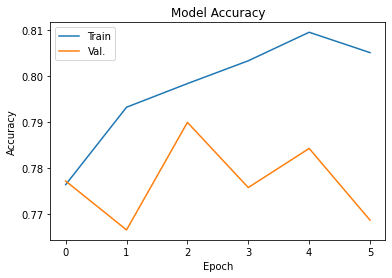

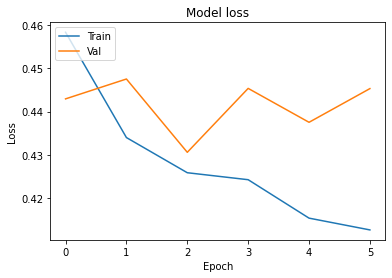

In [40]:
import matplotlib.pyplot as plt


# Plot training & validation MSE

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##Hyperparameter tuning using GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.optimizers import Adam, Nadam

In [42]:
X_train_scaled.shape[1:]

(19,)

In [0]:
inputs = X_train_scaled.shape[1]

####GridSearch CV for 5 parameters: learning rate, drop out, epochs, batch size, neurons in hidden layer

In [0]:
def create_model(learn_rate=0.001, batch_size=10, epochs=5, neurons=64, dropout_rate=0.2):
    # create model
    model = Sequential()

    model.add(Dense(128, input_shape=(inputs,)))
    model.add(tensorflow.keras.layers.PReLU())
    model.add(Dropout(0.2)) 

    model.add(Dense(64)) 
    model.add(tensorflow.keras.layers.PReLU())  #Hidden Layer 1
    model.add(Dropout(0.2)) 

    model.add(Dense(1, activation='sigmoid'))


    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

# create model
kf_model = KerasClassifier(build_fn=create_model, verbose=0)


In [0]:
# Define the grid search parameters
learn_rate= [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1]
optimizer = ['adam', 'nadam']
batch_size = [0, 10, 20, 30]
epochs = [1, 2, 3, 4, 5, 10]
dropout_rate = [0.0, 0.2, 0.3, 0.4, 0.5]
neurons = [16, 32, 64, 128] #hidden layer


param_grid = dict(learn_rate=learn_rate, epochs=epochs, neurons=neurons, dropout_rate=dropout_rate, batch_size=batch_size)


In [46]:
# Create Grid Search for learning rate


grid = GridSearchCV(estimator=kf_model, param_grid=param_grid, n_jobs=-1, verbose=1, scoring='accuracy', cv=5, refit=True)
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:  1.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 5970 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)

In [47]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.8070617698002052 using {'batch_size': 30, 'dropout_rate': 0.4, 'epochs': 10, 'learn_rate': 0.001, 'neurons': 64}


In [0]:
pipeline1 = grid_result.best_estimator_

In [49]:
y_pred = pipeline1.predict(X_val_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_pred)
print("Gridsearch Keras hypertuning validation accuracy=", val_accuracy)

Gridsearch Keras hypertuning validation accuracy= 0.7799858055358411


In [0]:
y_pred3 = (pipeline1.predict(X_val_scaled) > 0.5).astype("int32")

In [55]:
val_accuracy = accuracy_score(y_val, y_pred3, normalize=True)
print("Gridsearch Keras hypertuning validation accuracy=", val_accuracy)

Gridsearch Keras hypertuning validation accuracy= 0.7799858055358411


###Validation accuracy using best parameters from GridSearch CV = 77.99%

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?